In [44]:
import pandas as pd

In [45]:
file = pd.read_csv('Datasets/spam.csv')

In [46]:
file.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
file.groupby("Category").describe() 
#This is the method which can help us to visualize the data more clearly not neccessary but good to have the idea of the data

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [48]:
file['Spam'] = file.Category.apply(lambda x : 1 if x == 'spam' else 0)
# new columns called as 'Spam is added in the database so as it will have a value of 1 if mail is spam and value of 0 if the mail is not spam'

In [49]:
file.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [50]:
file = file.drop('Category', axis = 'columns') # The columns Category is dropped as it is of no use for us

In [51]:
file.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
v = CountVectorizer()

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
train_X, test_X, train_y, test_y = train_test_split(file.Message, file.Spam, test_size=0.2)

In [83]:
train_X_count = v.fit_transform(train_X)  
# Whenever we are having training session of the data at that point we have to use fit_transform method in the session

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
model = MultinomialNB()

In [86]:
model.fit(train_X_count, train_y)

MultinomialNB()

In [87]:
test_X_count = v.transform(test_X)
# wherein when we want to predict the model at that point we will be having transform method and not fit_transform

In [88]:
model.predict(test_X_count)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
test_y

832     0
4165    0
4404    0
4380    0
3056    1
       ..
1266    0
4651    0
3881    0
2382    0
2519    0
Name: Spam, Length: 1115, dtype: int64

In [90]:
model.score(test_X_count, test_y)

0.9874439461883409

In [91]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
email_count = v.transform(emails)
model.predict(email_count)

array([0, 1], dtype=int64)

Now from the steps above we have got that for everytime we have to train or test the model then we had to first convert it into vector form using countervectorizer but is it the only way to do so? Obviosly not. Hence we will have a pipeline where we can list the task that we want to perform before actually predicting or giving the score.

In [92]:
from sklearn.pipeline import Pipeline

In [99]:
model = Pipeline([
    ('vec', CountVectorizer()),
    ('md', MultinomialNB())
])

In [100]:
model.fit(train_X, train_y)

Pipeline(steps=[('vec', CountVectorizer()), ('md', MultinomialNB())])

In [101]:
model.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
model.score(test_X, test_y)

0.9874439461883409

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
cm = confusion_matrix(test_y, model.predict(test_X))

In [105]:
cm

array([[950,   3],
       [ 11, 151]], dtype=int64)

In [106]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: >

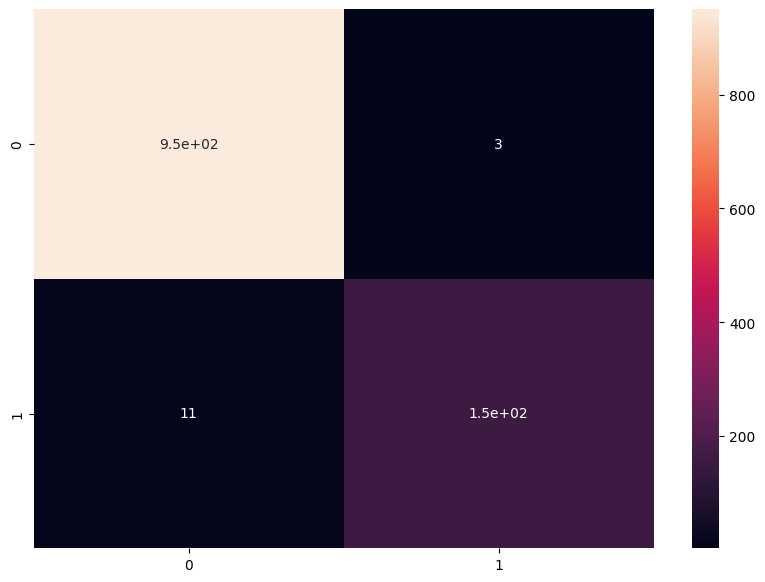

In [108]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True)

In [114]:
import pickle

In [116]:
with open('spam_detector', 'wb') as f:
    pickle.dump(model, f)